# Bonds #
## 22. Modeling Callable Bonds ##

In [2]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt
calc_date = ql.Date(16,8,2016)
ql.Settings.instance().evaluationDate = calc_date

In [3]:
day_count = ql.ActualActual(ql.ActualActual.Bond)
rate = 0.035
ts = ql.FlatForward(calc_date, rate, day_count, ql.Compounded, ql.Semiannual)
ts_handle = ql.YieldTermStructureHandle(ts)

In [5]:
callability_schedule = ql.CallabilitySchedule()
call_price = 100.0
call_date = ql.Date(15,ql.September,2016);
null_calendar = ql.NullCalendar();
for i in range(0,24):
    callability_price = ql.BondPrice(call_price, ql.BondPrice.Clean)
    callability_schedule.append(ql.Callability(callability_price, ql.Callability.Call, call_date))
    call_date = null_calendar.advance(call_date, 3, ql.Months)

In [7]:
issue_date = ql.Date(16,ql.September,2014)
maturity_date = ql.Date(15,ql.September,2022)
calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond)
tenor = ql.Period(ql.Quarterly)
accrual_convention = ql.Unadjusted
schedule = ql.Schedule(issue_date, maturity_date, tenor,
                       calendar, accrual_convention,
                       accrual_convention,
                       ql.DateGeneration.Backward, False)

In [8]:
settlement_days = 3
face_amount = 100
accrual_daycount = ql.ActualActual(ql.ActualActual.Bond)
coupon = 0.025
bond = ql.CallableFixedRateBond(settlement_days, face_amount,
                                schedule, [coupon], accrual_daycount,
                                ql.Following, face_amount, issue_date,
                                callability_schedule)

In [9]:
def value_bond(a, s, grid_points, bond):
    model = ql.HullWhite(ts_handle, a, s)
    engine = ql.TreeCallableFixedRateBondEngine(model, grid_points)
    bond.setPricingEngine(engine)
    return bond

In [10]:
value_bond(0.03, 0.12, 40, bond)
print("Bond price: ",bond.cleanPrice())

Bond price:  68.31810243227723


In [11]:
sigmas = np.arange(0.001, 0.15, 0.001)
prices = [value_bond(0.03, s, 40, bond).cleanPrice() for s in sigmas]

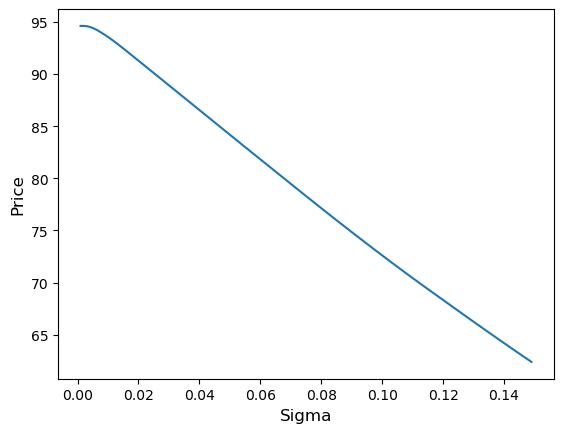

In [13]:
plt.plot(sigmas, prices);
plt.xlabel("Sigma", size=12);
plt.ylabel("Price", size=12);

In [14]:
for c in bond.cashflows():
    print(c.date(), " ", c.amount())

December 15th, 2014   0.6181318681318659
March 16th, 2015   0.6250000000000089
June 15th, 2015   0.6250000000000089
September 15th, 2015   0.6250000000000089
December 15th, 2015   0.6250000000000089
March 15th, 2016   0.6250000000000089
June 15th, 2016   0.6250000000000089
September 15th, 2016   0.6250000000000089
December 15th, 2016   0.6250000000000089
March 15th, 2017   0.6250000000000089
June 15th, 2017   0.6250000000000089
September 15th, 2017   0.6250000000000089
December 15th, 2017   0.6250000000000089
March 15th, 2018   0.6250000000000089
June 15th, 2018   0.6250000000000089
September 17th, 2018   0.6250000000000089
December 17th, 2018   0.6250000000000089
March 15th, 2019   0.6250000000000089
June 17th, 2019   0.6250000000000089
September 16th, 2019   0.6250000000000089
December 16th, 2019   0.6250000000000089
March 16th, 2020   0.6250000000000089
June 15th, 2020   0.6250000000000089
September 15th, 2020   0.6250000000000089
December 15th, 2020   0.6250000000000089
March 15th,